In [47]:
from sklearn.datasets import load_iris
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np
iris = load_iris()

In [48]:
X, y = iris.data, iris.target

In [54]:
target=y.reshape((y.shape[0],1))

In [55]:
X_Final = np.delete(X, [0, 1], axis=1)

### Afficher les données

In [ ]:
#X_Final,target

### Echantillonner les données

In [58]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_Final, target, test_size = 0.2, stratify=target, random_state=42 ) #Tjs utiliser stratify sur classif

In [59]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((120, 2), (30, 2), (120, 1), (30, 1))

### Entrainer le modèle avec max_depth=3, puis max_depth=4 jusqu'à max_depth=10

In [74]:
from sklearn.tree import DecisionTreeClassifier ,plot_tree


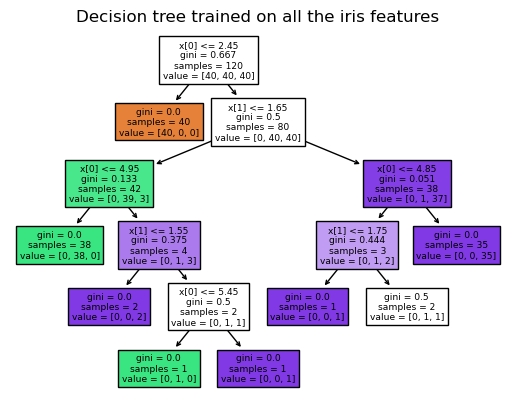

In [73]:
plt.figure()
clf = DecisionTreeClassifier(random_state=42)
clf = clf.fit(xtrain, ytrain)
plot_tree(clf, filled=True)
plt.title("Decision tree trained on all the iris features")
plt.show()
accuracy = accuracy_score(ytest, y_pred)

In [ ]:
plt.figure(figsize=(8,5), dpi=100)

plt.title("Distribution des données")

plt.hist([target, ytrain, ytest],
         bins = [x - 0.5 for x in range(0, 3)],
         rwidth=0.75,
         label=["Données originales", "Données d'apprentissage", "Données de test"])

plt.annotate("n = " + str(np.sum(y == 0)), (-0.25, 365.0), ha='center')
plt.annotate("n = " + str(np.sum(y_train == 0)), (0.0, 293.0), ha='center')
plt.annotate("n = " + str(np.sum(y_test == 0)), (0.25, 80.0), ha='center')

plt.annotate("n = " + str(np.sum(y == 1)), (0.75, 220.0), ha='center')
plt.annotate("n = " + str(np.sum(y_train == 1)), (1.0, 178.0), ha='center')
plt.annotate("n = " + str(np.sum(y_test == 1)), (1.25, 50.0), ha='center')

plt.xticks(np.arange(2), ("Benign", "Malignant"))
 
plt.xlabel("Label")
plt.ylabel("Nombre d'exemples")
plt.ylim(0.0, 400.0)
plt.legend()

plt.show()

In [78]:

# Define a list of max_depth values to try
max_depth_values = list(range(3, 11))

# Train decision tree models with different max_depth values
for max_depth in max_depth_values:
    # Create and train the decision tree model
    dt_model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    dt_model.fit(xtrain, ytrain)
    
    # Make predictions on the training set
    y_train_pred = dt_model.predict(xtrain)
    # Make predictions on the test set
    y_test_pred = dt_model.predict(xtest)
    
    # Calculate and print the accuracy on the training set
    train_accuracy = accuracy_score(ytrain, y_train_pred)
    print(f"Max Depth = {max_depth}, Training Accuracy = {train_accuracy:.4f}")
    
    # Calculate and print the accuracy on the test set
    test_accuracy = accuracy_score(ytest, y_test_pred)
    print(f"Max Depth = {max_depth}, Test Accuracy = {test_accuracy:.4f}")


Max Depth = 3, Training Accuracy = 0.9833
Max Depth = 3, Test Accuracy = 0.9667
Max Depth = 4, Training Accuracy = 0.9833
Max Depth = 4, Test Accuracy = 0.9333
Max Depth = 5, Training Accuracy = 0.9917
Max Depth = 5, Test Accuracy = 0.9333
Max Depth = 6, Training Accuracy = 0.9917
Max Depth = 6, Test Accuracy = 0.9333
Max Depth = 7, Training Accuracy = 0.9917
Max Depth = 7, Test Accuracy = 0.9333
Max Depth = 8, Training Accuracy = 0.9917
Max Depth = 8, Test Accuracy = 0.9333
Max Depth = 9, Training Accuracy = 0.9917
Max Depth = 9, Test Accuracy = 0.9333
Max Depth = 10, Training Accuracy = 0.9917
Max Depth = 10, Test Accuracy = 0.9333


In [ ]:
# Plus la profondeur de l'arbre augmente, notre modele devient plus complexe et la précision sur l'ensemble d'apprentissage augmente.
# inversement la performance sur notre jet de test diminue,ceci montre qu'il ya un surapprentissage. 
# in va falloir trouver un score qui offre la meilleure performance de généralisation sur des données test(inconnues)
# Pour éviter le surapprentissage, il est préférable de choisir un score qui offre la meilleure précision sur l'ensemble de test et aussi une hautre 
# precision sur les valeurs de train 

### Nous allons appliquer la crossvalidation pour confirmer ce resultat 

In [79]:


# Définir une liste de valeurs max_depth à essayer
max_depth_values = list(range(3, 11))

# Effectuer la validation croisée pour chaque valeur max_depth
for max_depth in max_depth_values:
    # Créer le modèle d'arbre de décision
    dt_model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    
    # Effectuer la validation croisée (cross-validation) avec 5 folds
    # La fonction cross_val_score retourne une liste des scores d'exactitude pour chaque fold
    scores = cross_val_score(dt_model, X, y, cv=5)
    
    # Calculer et afficher la moyenne des scores d'exactitude pour cette valeur max_depth
    mean_accuracy = np.mean(scores)
    print(f"Max Depth = {max_depth}, Cross-Validated Accuracy = {mean_accuracy:.4f}")


NameError: name 'cross_val_score' is not defined